# ACC Fronts Test

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import matplotlib.colors as colors
import seaborn as sns
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo
import gsw
import scipy.ndimage as filter
import scipy.interpolate as interpolate
from flox.xarray import xarray_reduce
from xgcm.autogenerate import generate_grid_ds
from xgcm import Grid

In [5]:
from ftplib import FTP

ftp = FTP('ftp-access.aviso.altimetry.fr')
ftp.login(user='afagerheim@ldeo.columbia.edu', passwd='pwWn8I')
ftp.cwd('acc-fronts')
files = ftp.nlst()
print(files)  # See what's available
ftp.quit()


['CTOH_PolarFront_weekly_1993_2023.nc', 'CTOH_SubantarcticFront_weekly_1993_2023.nc', 'CTOH_NorthernSubantarcticFront_weekly_1993_2023.nc']


'221 Goodbye.'

In [10]:
from ftplib import FTP
import os

# FTP connection details
ftp_host = 'ftp-access.aviso.altimetry.fr'
ftp_user = 'afagerheim@ldeo.columbia.edu'
ftp_passwd = 'pwWn8I'
ftp_dir = 'acc-fronts'

# Local directory to save files
local_dir = '/swot/SUM05/amf2288/acc_fronts'
os.makedirs(local_dir, exist_ok=True)

# Connect and login
ftp = FTP(ftp_host)
ftp.login(user=ftp_user, passwd=ftp_passwd)
ftp.cwd(ftp_dir)

# List files
files = ftp.nlst()
print("Files available:", files)

# Download each file
for filename in files:
    local_path = os.path.join(local_dir, filename)
    with open(local_path, 'wb') as f:
        print(f"Downloading {filename}...")
        ftp.retrbinary(f"RETR {filename}", f.write)
        print(f"Saved to {local_path}")

ftp.quit()


Files available: ['CTOH_PolarFront_weekly_1993_2023.nc', 'CTOH_SubantarcticFront_weekly_1993_2023.nc', 'CTOH_NorthernSubantarcticFront_weekly_1993_2023.nc']
Saved to /swot/SUM05/amf2288/acc_fronts/CTOH_PolarFront_weekly_1993_2023.nc
Saved to /swot/SUM05/amf2288/acc_fronts/CTOH_SubantarcticFront_weekly_1993_2023.nc
Saved to /swot/SUM05/amf2288/acc_fronts/CTOH_NorthernSubantarcticFront_weekly_1993_2023.nc


'221 Goodbye.'

In [22]:
ds = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/ds_high_res_1.nc')
PF = xr.open_dataarray('/swot/SUM05/amf2288/acc_fronts/CTOH_PolarFront_weekly_1993_2023.nc')
SAF = xr.open_dataarray('/swot/SUM05/amf2288/acc_fronts/CTOH_SubantarcticFront_weekly_1993_2023.nc')
NSAF = xr.open_dataarray('/swot/SUM05/amf2288/acc_fronts/CTOH_NorthernSubantarcticFront_weekly_1993_2023.nc')

In [43]:
PF_mean = PF.sel(time=slice(ds.TIME.min().values, ds.TIME.max().values)).mean('time')
SAF_mean = SAF.sel(time=slice(ds.TIME.min().values, ds.TIME.max().values)).mean('time')
NSAF_mean = NSAF.sel(time=slice(ds.TIME.min().values, ds.TIME.max().values)).mean('time')

In [49]:
PF.sel(time=slice(ds.TIME.min().values, ds.TIME.max().values)).mean('time')

<xarray.DataArray 'PF' (longitude: 3215)> Size: 13kB
array([-46.819252, -46.805943, -46.79583 , ...,        nan,        nan,
              nan], dtype=float32)
Dimensions without coordinates: longitude

/home.ufs/amf2288/miniforge3/envs/Argo_Feb_25/lib/python3.12/site-packages/shapely/creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)
/home.ufs/amf2288/miniforge3/envs/Argo_Feb_25/lib/python3.12/site-packages/shapely/creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)
/home.ufs/amf2288/miniforge3/envs/Argo_Feb_25/lib/python3.12/site-packages/shapely/creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)


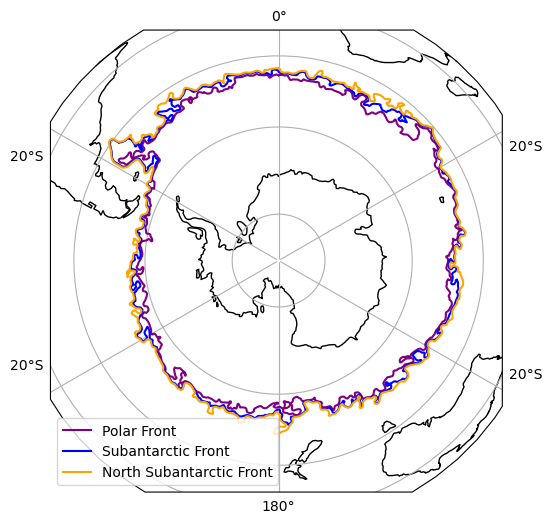

In [39]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_extent([-180,180,-90,-30], crs=ccrs.PlateCarree())
ax.plot(PF.longitude.values[0], PF.isel(time=0).values, color='purple', linewidth=1.5, transform=ccrs.PlateCarree(), label='Polar Front')
ax.plot(SAF.longitude.values[0], SAF.isel(time=0).values, color='blue', linewidth=1.5, transform=ccrs.PlateCarree(), label='Subantarctic Front')
ax.plot(NSAF.longitude.values[0], NSAF.isel(time=0).values, color='orange', linewidth=1.5, transform=ccrs.PlateCarree(), label='North Subantarctic Front')
ax.legend(loc='lower left')

/home.ufs/amf2288/miniforge3/envs/Argo_Feb_25/lib/python3.12/site-packages/shapely/creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)
/home.ufs/amf2288/miniforge3/envs/Argo_Feb_25/lib/python3.12/site-packages/shapely/creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)
/home.ufs/amf2288/miniforge3/envs/Argo_Feb_25/lib/python3.12/site-packages/shapely/creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)


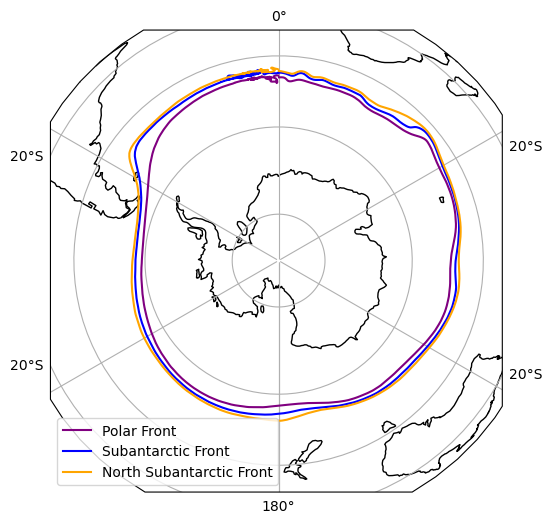

In [34]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_extent([-180,180,-90,-30], crs=ccrs.PlateCarree())
ax.plot(PF.longitude.mean('time'), PF.mean('time'), color='purple', linewidth=1.5, transform=ccrs.PlateCarree(), label='Polar Front')
ax.plot(SAF.longitude.mean('time'), SAF.mean('time'), color='blue', linewidth=1.5, transform=ccrs.PlateCarree(), label='Subantarctic Front')
ax.plot(NSAF.longitude.mean('time'), NSAF.mean('time'), color='orange', linewidth=1.5, transform=ccrs.PlateCarree(), label='North Subantarctic Front')
ax.legend(loc='lower left')

/home.ufs/amf2288/miniforge3/envs/Argo_Feb_25/lib/python3.12/site-packages/shapely/creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)
/home.ufs/amf2288/miniforge3/envs/Argo_Feb_25/lib/python3.12/site-packages/shapely/creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)
/home.ufs/amf2288/miniforge3/envs/Argo_Feb_25/lib/python3.12/site-packages/shapely/creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)


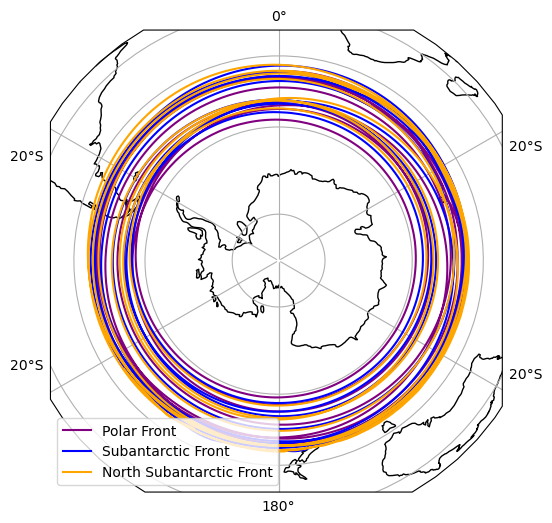

In [50]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_extent([-180,180,-90,-30], crs=ccrs.PlateCarree())
ax.plot(PF_mean.longitude, PF_mean, color='purple', linewidth=1.5, transform=ccrs.PlateCarree(), label='Polar Front')
ax.plot(SAF_mean.longitude, SAF_mean, color='blue', linewidth=1.5, transform=ccrs.PlateCarree(), label='Subantarctic Front')
ax.plot(NSAF_mean.longitude, NSAF_mean, color='orange', linewidth=1.5, transform=ccrs.PlateCarree(), label='North Subantarctic Front')
ax.legend(loc='lower left')